In [1]:
from MRF import *
import matplotlib.pyplot as plt

In [2]:
simulated_data = pd.read_csv("../Datasets/mrf_sim.csv", index_col = 'index')

In [3]:
url='https://drive.google.com/file/d/1Sp_2HGdIY0y9m5htlskIbNqWo02FCGNb/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
simulated_data = pd.read_csv(url, index_col = "index")

In [4]:
simulated_data

,sim_y,sim_x1,sim_x2,sim_x3,sim_x4,sim_x5,sim_x6,sim_x7,sim_x8,sim_x9,sim_x10,sim_x11,sim_x12,sim_x13,sim_x14,sim_x15,trend
index,,,,,,,,,,,,,,,,,
0,-0.441805,1.262954,-1.045718,-0.390010,-1.687801,-1.424032,-0.286852,-0.959316,-0.123546,-0.614495,-0.183680,0.444346,-0.661850,1.357601,0.095309,-0.276508,1
1,-2.793370,-0.326233,-0.896211,-1.819222,0.647646,-1.669344,1.841107,-1.620317,0.147393,2.827808,0.237404,0.011929,-0.346816,-0.322125,0.991170,-0.854418,2
2,2.537384,1.329799,1.269387,0.659181,0.448794,1.379236,-0.156764,0.822513,-1.240966,1.500310,-0.570730,-0.009280,1.339732,-1.106561,0.428252,1.484950,3
3,1.769591,1.272429,0.593841,0.459622,1.026302,-0.919675,-1.389803,0.108713,2.004243,-0.038204,0.678865,-0.302378,0.592419,0.038225,1.118214,-1.597299,4
4,2.299628,0.414641,0.775634,1.616626,1.074978,-0.504490,-1.473104,0.760995,-0.771980,-0.833423,-1.465345,0.492355,0.718904,0.743779,-0.739658,0.374999,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.986892,1.790485,-1.688692,-1.505401,0.164891,1.017508,-0.371810,-0.461154,-1.123832,1.108883,0.002205,-0.197546,0.061681,-0.326253,0.478526,-1.590491,196
196,-0.458651,-1.064165,-1.572373,1.519297,0.868577,-0.969918,0.291791,1.904377,1.081743,2.059115,-0.346824,2.592252,-1.194686,1.776474,-0.540043,0.734870,197
197,0.800348,0.017637,-0.404987,0.367409,-1.078034,1.066352,-0.418050,-0.348632,1.261543,-0.096137,-0.485862,1.287147,1.217083,-1.643429,2.498486,1.150781,198


In [5]:
### Dependent Variable
my_var = "sim_y"
y_pos = simulated_data.columns.get_loc(my_var)

### Exogenous Variables
S_vars = [f"sim_x{i}" for i in range(1, 16)] + ['trend']
S_pos = [simulated_data.columns.get_loc(s) for s in S_vars]

### Variables Included in Linear Equation
x_vars = ["sim_x1", 'sim_x2', 'sim_x3']
x_pos = [simulated_data.columns.get_loc(x) for x in x_vars]

In [6]:
original_data = simulated_data.copy()

In [7]:
oos_pos = np.arange(len(simulated_data)- 50, len(simulated_data)) # lower should be oos start, upper the length of your dataset

In [8]:
MRF = MacroRandomForest(data = simulated_data,
                        y_pos = y_pos,
                        x_pos = x_pos,
                        S_pos = S_pos, 
                        B = 200, 
                        parallelise = True,
                        n_cores = 3,
                        resampling_opt = 2,
                        oos_pos = oos_pos,
                        trend_push = 4,
                        quantile_rate = 0.3, 
                        print_b = True,
                        fast_rw = True)

In [9]:
mrf_output = MRF._ensemble_loop()

Tree 2 out of 200Tree 3 out of 200

Tree 1 out of 200
Tree 4 out of 200
Tree 5 out of 200
Tree 6 out of 200
Tree 7 out of 200
Tree 9 out of 200
Tree 8 out of 200
Tree 10 out of 200
Tree 11 out of 200
Tree 12 out of 200
Tree 13 out of 200
Tree 15 out of 200
Tree 14 out of 200
Tree 16 out of 200
Tree 17 out of 200
Tree 18 out of 200
Tree 19 out of 200
Tree 20 out of 200
Tree 21 out of 200
Tree 22 out of 200
Tree 23 out of 200
Tree 24 out of 200
Tree 25 out of 200
Tree 26 out of 200
Tree 27 out of 200
Tree 28 out of 200
Tree 29 out of 200
Tree 31 out of 200
Tree 30 out of 200
Tree 32 out of 200
Tree 34 out of 200
Tree 33 out of 200
Tree 35 out of 200
Tree 36 out of 200
Tree 37 out of 200
Tree 38 out of 200
Tree 40 out of 200
Tree 39 out of 200
Tree 42 out of 200
Tree 41 out of 200
Tree 43 out of 200
Tree 44 out of 200
Tree 45 out of 200
Tree 46 out of 200
Tree 47 out of 200
Tree 48 out of 200
Tree 49 out of 200
Tree 50 out of 200
Tree 51 out of 200
Tree 52 out of 200
Tree 53 out of 200
Tr

In [15]:
mrf_output

{'YandX':               0         1         2         3
 index                                        
 0     -0.441805  1.262954 -1.045718 -0.390010
 1     -2.793370 -0.326233 -0.896211 -1.819222
 2      2.537384  1.329799  1.269387  0.659181
 3      1.769591  1.272429  0.593841  0.459622
 4      2.299628  0.414641  0.775634  1.616626
 ...         ...       ...       ...       ...
 195   -0.986892  1.790485 -1.688692 -1.505401
 196   -0.458651 -1.064165 -1.572373  1.519297
 197    0.800348  0.017637 -0.404987  0.367409
 198    1.773411 -0.389909  0.319286  1.699862
 199    0.488845 -0.490833  0.040428  0.644197
 
 [200 rows x 4 columns],
 'pred_ensemble': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'pred':      Ensembled_Prediction
 0              

In [10]:
forecasts = pd.DataFrame(mrf_output['pred'])

In [11]:
forecasts

,Ensembled_Prediction
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
195,NaN
196,NaN
197,NaN
198,NaN


Text(0.5, 1.0, 'OOS predictions of MRF')

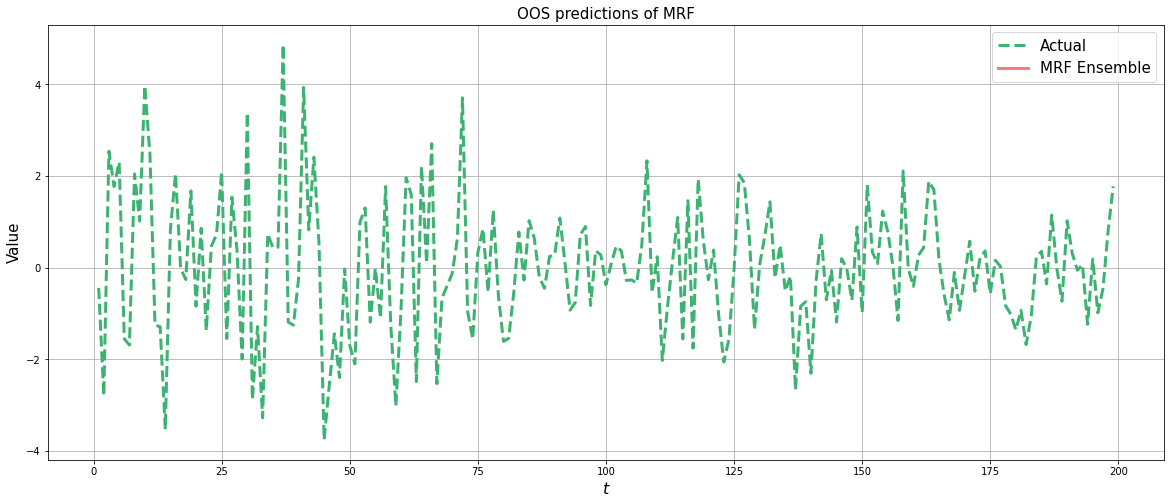

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

ax.plot(original_data['sim_y'].shift(1).loc[oos_pos], label = 'Actual', linewidth = 3, color ='mediumseagreen', linestyle = '--')
ax.plot(forecasts, color = 'lightcoral', linewidth = 3, label = "MRF Ensemble")
ax.legend(fontsize = 15)
ax.set_ylabel("Value", fontsize = 15)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF", fontsize = 15)

/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


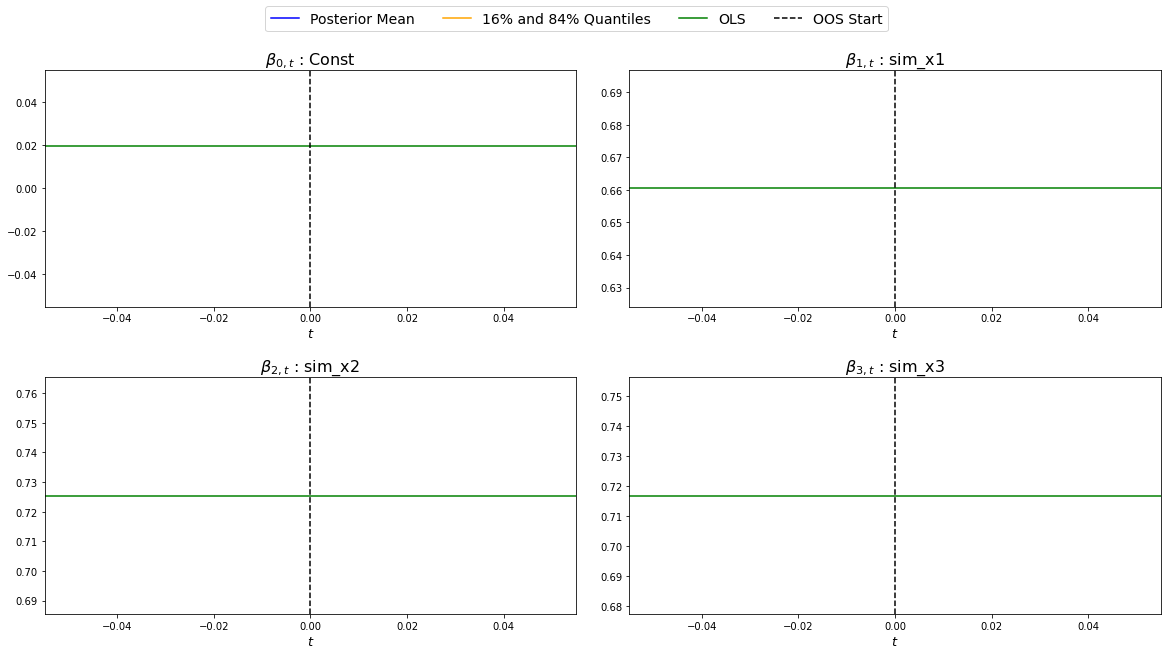

In [13]:
MRF.band_plots()